## Train x-modalix example

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
import os
from autoencodix.configs.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
    checkpoint_interval=25,
	loss_reduction = "sum",
    class_param="early",
    epochs=250,
    pretrain_epochs=0,
	beta = 0.001,
	gamma= 1.5,
    # gamma= 0,
	delta_class= 0,
	delta_pair = 1,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=32,
    batch_size=32,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=50,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_pipeline.py:189: UserWarning: Your config is of type: <class 'autoencodix.configs.default_config.DefaultConfig'>, for this pipeline the default params of: <class 'autoencodix.configs.xmodalix_config.XModalixConfig'> work best
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_imgreader.py:260: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep, index_col=0)
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/data/_filter.py:102: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Given image size is possible, rescaling images to: 64x64
Successfully loaded 260 images for IMG
DP:
multi_bulk:
  RNA: 260 samples × 279 features
annotation:
  paired: 260 samples × 3 features
  IMG: 260 samples × 3 features
img:
  IMG: 260 items
k: multi_sc
k: multi_bulk
k: annotation
k: img
k: from_modality
k: to_modality
DP:
multi_bulk:
  RNA: 260 samples × 279 features
annotation:
  paired: 260 samples × 3 features
  IMG: 260 samples × 3 features
img:
  IMG: 260 items
k: multi_sc
k: multi_bulk
k: annotation
k: img
k: from_modality
k: to_modality
DP:
multi_bulk:
  RNA: 260 samples × 279 features
annotation:
  paired: 260 samples × 3 features
  IMG: 260 samples × 3 features
img:
  IMG: 260 items
k: multi_sc
k: multi_bulk
k: annotation
k: img
k: from_modality
k: to_modality
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...
key: train, type: <class 'dict'>
key: valid, type: <class 'dict'>


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [ ]:
# list(xmodalix.result.sample_ids.get(epoch=-1, split="test")['translation']).index('T_34')

ValueError: 'T_34' is not in list

Creating plots ...


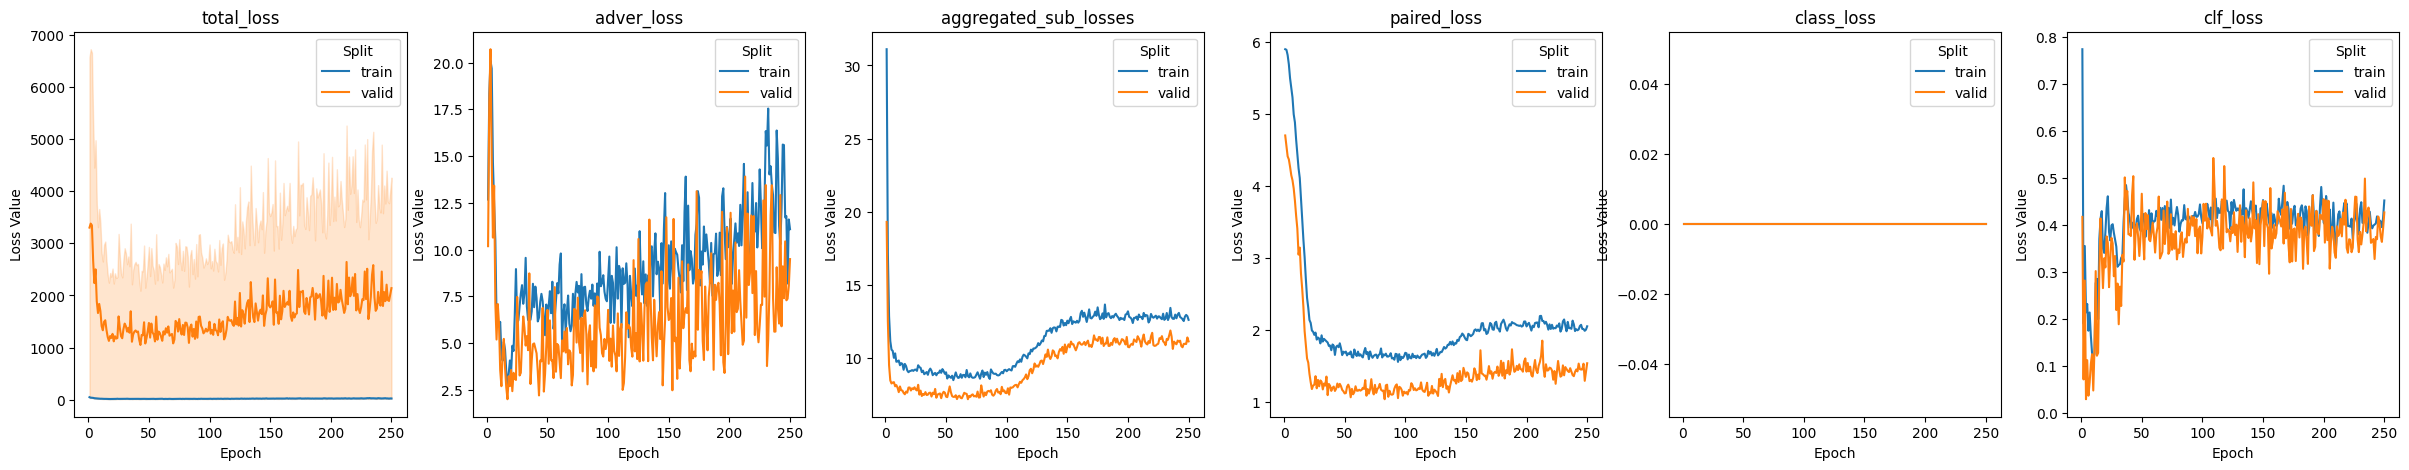

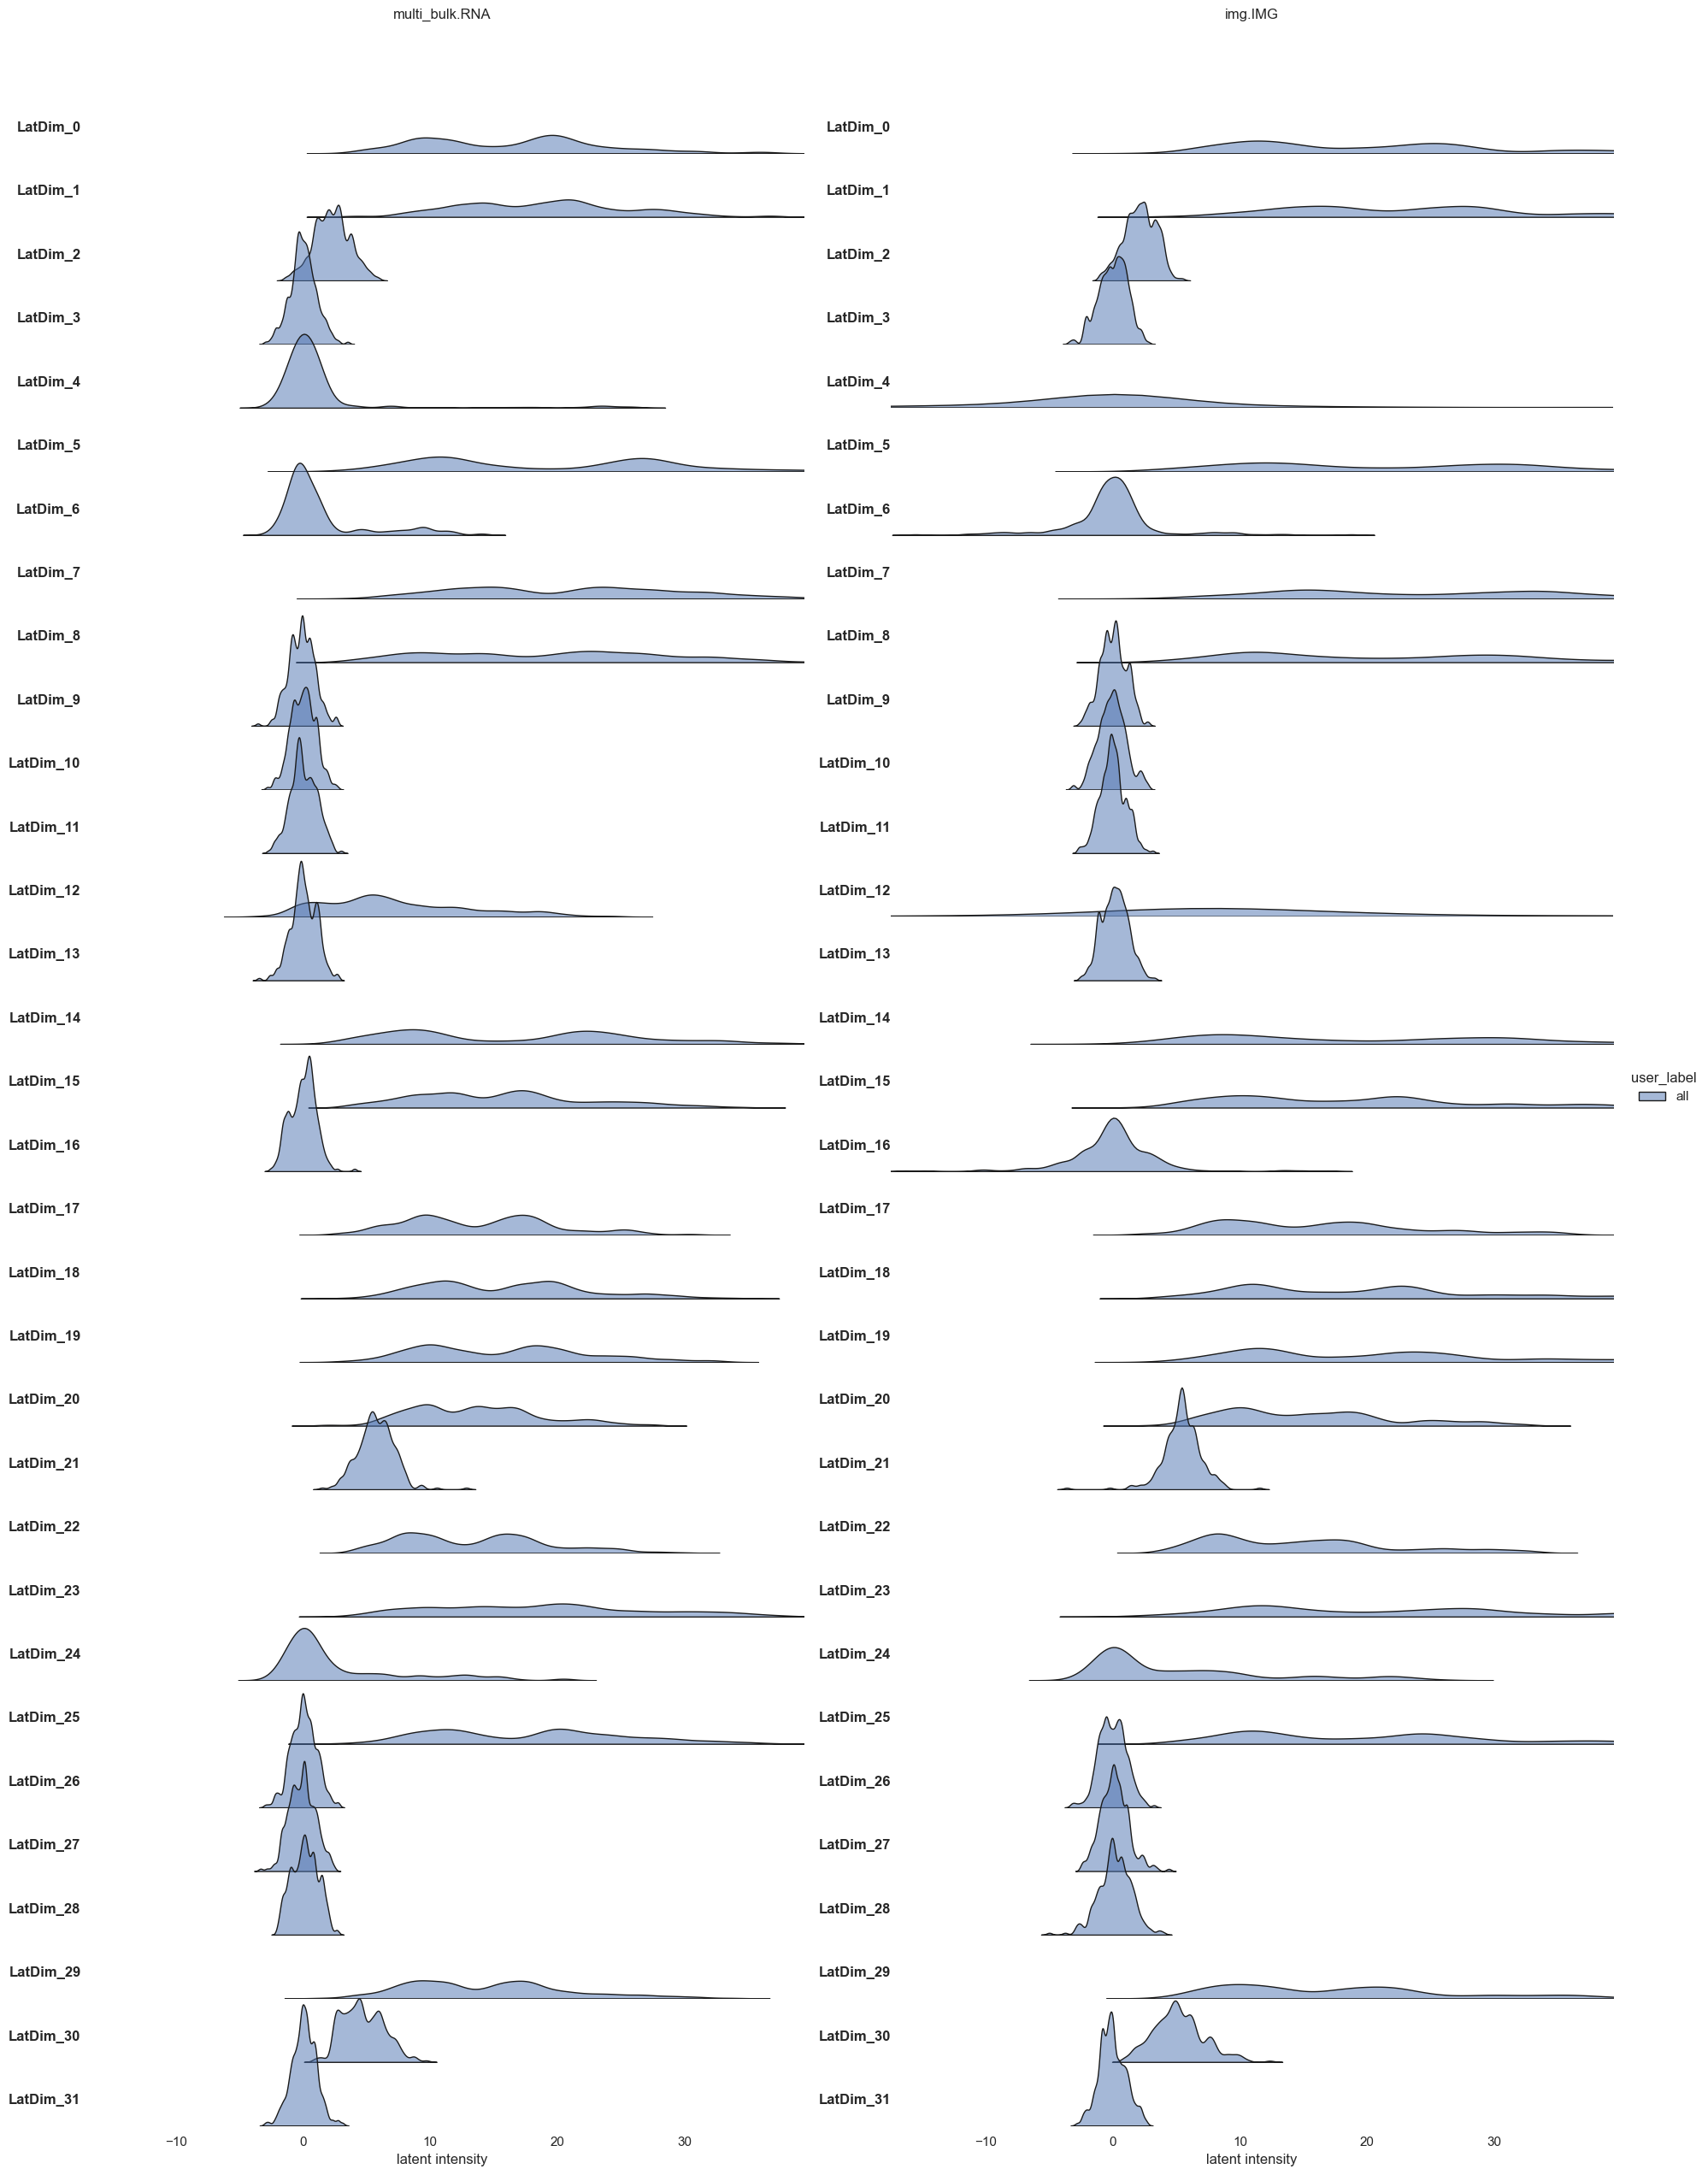

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Index([    nan,  'T_32', 'T_114', 'T_128', 'T_129', 'T_101',  'T_25', 'T_117',
        'T_31',  'T_19',
       ...
       'T_194', 'T_179', 'T_224',  'T_12', 'T_122', 'T_241', 'T_137',  'T_15',
       'T_244', 'T_130'],
      dtype='object', name='sample_ids', length=261)


ValueError: 'sample_ids' is both an index level and a column label, which is ambiguous.

In [4]:
xmodalix.show_result()

In [ ]:
to_key ="img.IMG"
print("Original test dataset size:",)
print(len(xmodalix.result.datasets.test.datasets[to_key]))

In [ ]:
print("Reconstructed test dataset size:",)
print(len(xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]))

In [ ]:
import numpy as np
print("Total sample ids")
print(len(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key]))
print("Unique sample ids")
print(len(np.unique(xmodalix.result.sample_ids.get(epoch=-1, split="test")[to_key])))

In [ ]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix._visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [ ]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovo'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovo'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


In [ ]:
xmodalix.result.embedding_evaluation

In [ ]:
fig = xmodalix._visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovo"
)

## UMAP/PCA translation visualization

In [ ]:
fig = xmodalix._visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality="img.IMG",
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

## Recon error and VAE pure comparison

In [ ]:
## Imagix (pure comparison)
from autoencodix.configs.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [ ]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

In [ ]:
imagix.show_result()

In [ ]:
# n_samples = 3
imagix.result.datasets.test.sample_ids

In [ ]:
imagix._visualizer.show_image_recon_grid(result=imagix.result)

In [ ]:
param = "early"
fig, df_comparison = xmodalix._evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix._visualizer.plots["PureVAEComparison"][param] = fig
fig.figure